# Particle Swarm Optimization Algorithm (in Python!) 

First of all, let's import the libraries we'll need (remember we are using Python 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy as sp
# import time


%matplotlib inline
plt.style.use('bmh')

We can define and plot the function we want to optimize:

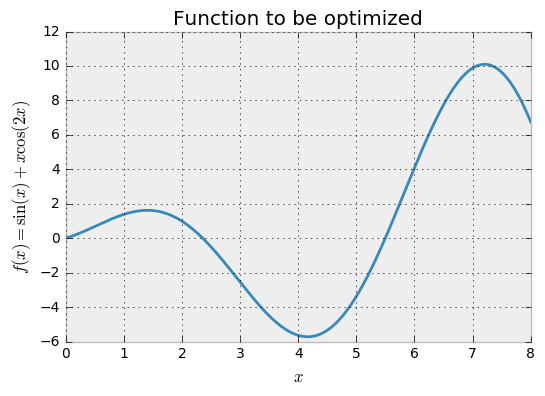

In [2]:
x_lo = 0
x_up = 8
n_points = 1000

x = np.linspace(x_lo, x_up, n_points)

def f(x):
    return x*np.sin(x) + x*np.cos(x)
    #return x*np.sin(x) + x*np.cos(5*x**2)

y = f(x)

plt.plot(x,y)
plt.ylabel('$f(x) = \sin(x)+x\cos(2x)$')
plt.xlabel('$x$')
plt.title('Function to be optimized')

So we will be using the [Particle Swarm Optimization algorithm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) to obtain the minumum (SPOILER!)
![PSO-1D](img/PSS-Example-1D.gif)

## PSO Algorithm

In [3]:
# PSO parameters
#from IPython.core.debugger import Tracer

n_iterations = 100
    
def run_PSO(n_particles=5, omega=0.1, phi_p=0.1, phi_g=0.1):
    """ PSO algorithm to a funcion already defined.
    Params:
        omega = 0.5  # Particle weight (intertial)
        phi_p = 0.1  # particle best weight
        phi_g = 0.1  # global global weight
    
    """
    global x_best_p_global, x_particles, y_particles, u_particles, v_particles
    
    ## Initialization:

    x_particles = np.zeros((n_particles, n_iterations))
    x_particles[:, 0] = np.random.uniform(x_lo, x_up, size=n_particles)

    x_best_particles = np.copy(x_particles[:, 0])

    y_particles = f(x_particles[:, 0])
    y_best_global = np.min(y_particles[:])
    index_best_global = np.argmin(y_particles[:])
    x_best_p_global = np.copy(x_particles[index_best_global,0])

    # velocity units are [Length/iteration]
    velocity_lo = x_lo-x_up 
    velocity_up = x_up-x_lo 

    u_particles = np.zeros((n_particles, n_iterations))
    u_particles[:, 0] = 0.01*np.random.uniform(velocity_lo, velocity_up, size=n_particles)

    v_particles = np.zeros((n_particles, n_iterations)) # Needed for plotting the velocity as vectors
    
    # PSO STARTS

    iteration = 1
    while iteration <= n_iterations-1:
        for i in range(n_particles):
                x_p = x_particles[i, iteration-1]
                u_p = u_particles[i, iteration-1]
                x_best_p = x_best_particles[i]


                r_p = np.random.uniform(0, 1)
                r_g = np.random.uniform(0, 1)

                u_p_new = omega*u_p+ \
                            phi_p*r_p*(x_best_p-x_p) + \
                            phi_g*r_g*(x_best_p_global-x_p)

                x_p_new = x_p + u_p_new

                if not x_lo <= x_p_new <= x_up: 
                    x_p_new = x_p # ignore new position, it's out of the domain
                    u_p_new = 0

                x_particles[i, iteration] = np.copy(x_p_new)
                u_particles[i, iteration] = np.copy(u_p_new)

                y_p_best = f(x_best_p)
                y_p_new = f(x_p_new)


                if y_p_new < y_p_best:
                    x_best_particles[i] = x_p_new

                    y_p_best_global = f(x_best_p_global)
                    if y_p_new < y_p_best_global:
                        x_best_p_global = np.copy(x_p_new)

        iteration = iteration + 1
    
    
    # Plotting convergence
    
    y_particles = f(x_particles)
    y_particles_best_hist = np.min(y_particles, axis=0)
    y_particles_worst_hist = np.max(y_particles, axis=0)

    y_best_global = np.min(y_particles[:])
    index_best_global = np.argmin(y_particles[:])
    
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 1))
    

    # Limits of the function being plotted   
    ax1.plot((0,n_iterations),(np.min(y),np.min(y)), '--g', label="min$f(x)$")
    ax1.plot((0,n_iterations),(np.max(y),np.max(y)),'--r',  label="max$f(x)$")
    
    # Convergence of the best particle and worst particle value
    ax1.plot(np.arange(n_iterations),y_particles_best_hist,'ko',  label="$p_{best}$")
    ax1.plot(np.arange(n_iterations),y_particles_worst_hist,'bo', label="$p_{wors}$")
    
    ax1.set_xlim((0,n_iterations))
    
    ax1.set_ylabel('$f(x)$')
    ax1.set_xlabel('$i$ (iteration)')
    ax1.set_title('Convergence')   
    
    ax1.legend()
    
    return 

array(4.162643672047177)

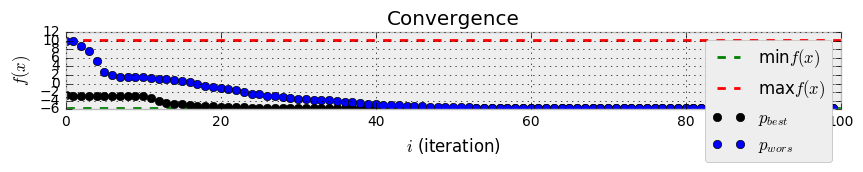

In [4]:
run_PSO()
x_best_p_global

# Animation

In [5]:
from __future__ import print_function
import ipywidgets as widgets
from IPython.display import display, HTML

In [6]:
def plotPSO(i=0): #iteration
    """Visualization of particles and obj. function"""
    
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    
    ax1.plot(x,y)
    
    ax1.set_xlim((x_lo,x_up))
    
    ax1.set_ylabel('$f(x)$')
    ax1.set_xlabel('$x$')
    ax1.set_title('Function to be optimized')
    
    #from IPython.core.debugger import Tracer
    #Tracer()() #this one triggers the debugger
    
    y_particles = f(x_particles)

    ax1.plot(x_particles[:,i],y_particles[:,i], "ro")
    ax1.quiver(x_particles[:,i],y_particles[:,i],u_particles[:,i],v_particles[:,i],
              angles='xy', scale_units='xy', scale=1)
    
    n_particles, iterations =  x_particles.shape
    tag_particles = range(n_particles)
    
    for j, txt in enumerate(tag_particles):
        ax1.annotate(txt, (x_particles[j,i],y_particles[j,i]))
        

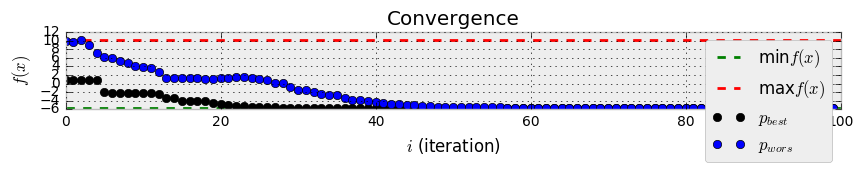

In [7]:
w_arg_PSO = widgets.interact(run_PSO,
                            n_particles=(2,50),
                            omega=(0,1,0.001),
                            phi_p=(0,1,0.001),
                            phi_g=(0,1,0.001))

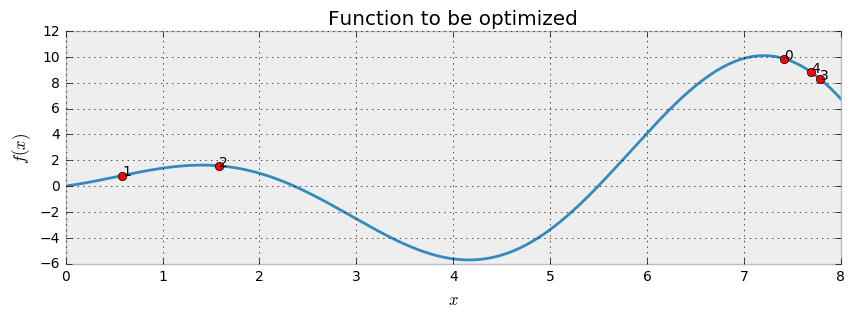

In [8]:
w_viz_PSO = widgets.interact(plotPSO, i=(0,n_iterations-1))

Note:
<div class=\"alert alert-success\">
As of ipywidgets 5.0, only static images of the widgets in this notebook will show on http://nbviewer.ipython.org. To view the live widgets and interact with them, you will need to download this notebook and run it with a Jupyter Notebook server.
</div>

In [9]:
# More examples in https://github.com/ipython/ipywidgets/tree/master/docs/source/examples